<a href="https://colab.research.google.com/github/PRazzoto/Sistemas_Inteligentes_Trab2/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

## Importing the libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [14]:
dataset = pd.read_csv('treino_sinais_vitais_com_label.txt', header=None)
X = dataset.iloc[:, 1:-2].values  # Variáveis independentes
y_continuous = dataset.iloc[:, -2].values  # Penúltima coluna como valor contínuo

##Split data into training and testing


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

## Training the Random Forest Regression model on the whole dataset

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10000, max_depth=None ,criterion='squared_error')
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10000)

## Predicting a new result

In [17]:
y_pred_continuous = regressor.predict(X_test)

In [18]:
def map_to_categories(predictions):
    categories = []
    for value in predictions:
        if 0 <= value < 25:
            categories.append(1)
        elif 25 <= value < 50:
            categories.append(2)
        elif 50 <= value < 75:
            categories.append(3)
        elif 75 <= value <= 100:
            categories.append(4)
    return np.array(categories)

y_pred_categories = map_to_categories(y_pred_continuous)
y_test_categories = map_to_categories(y_test)

In [19]:
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error
print("Avaliação da Regressão (Valor Contínuo):")
print(f"Erro Médio Absoluto (MAE): {mean_absolute_error(y_test, y_pred_continuous):.2f}")

print("\nAvaliação da Classificação (Categorias):")
print(classification_report(y_test_categories, y_pred_categories))
print("Acurácia:", accuracy_score(y_test_categories, y_pred_categories))
acuracia = accuracy_score(y_test_categories, y_pred_categories)
print(f"Porcentagem de acertos: {acuracia * 100:.2f}%")

Avaliação da Regressão (Valor Contínuo):
Erro Médio Absoluto (MAE): 1.83

Avaliação da Classificação (Categorias):
              precision    recall  f1-score   support

           1       1.00      0.87      0.93        46
           2       0.93      0.96      0.95       171
           3       0.90      0.92      0.91        77
           4       1.00      0.67      0.80         6

    accuracy                           0.93       300
   macro avg       0.96      0.86      0.90       300
weighted avg       0.94      0.93      0.93       300

Acurácia: 0.9333333333333333
Porcentagem de acertos: 93.33%


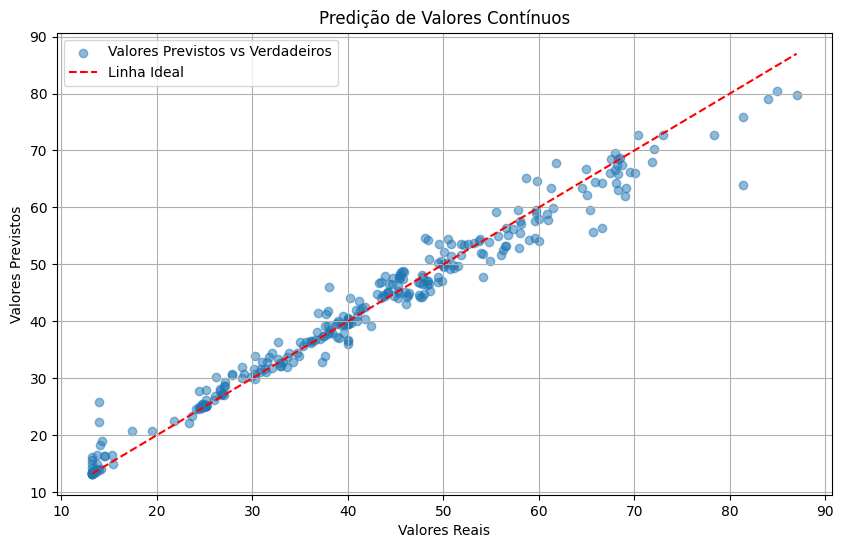

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_continuous, alpha=0.5, label="Valores Previstos vs Verdadeiros")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Linha Ideal")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Predição de Valores Contínuos")
plt.legend()
plt.grid(True)
plt.show()


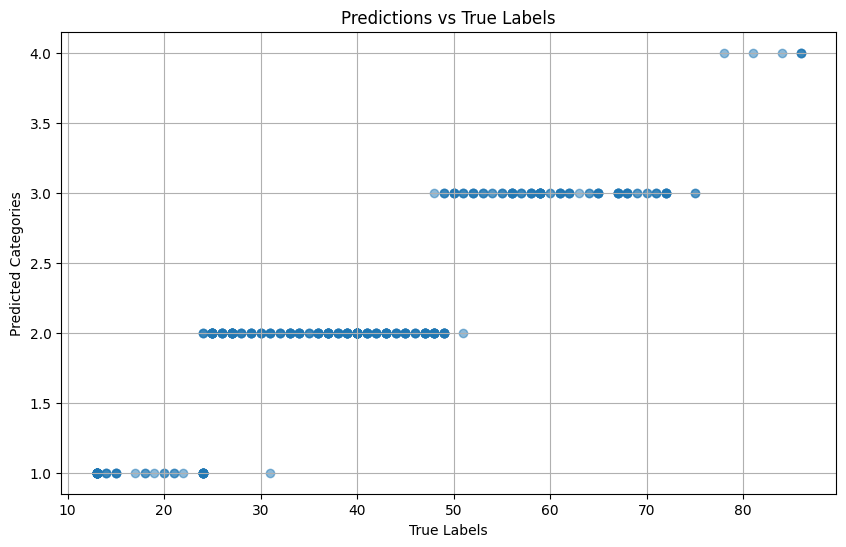

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred_mapped, alpha=0.5, label="Predictions vs True")
plt.xlabel("True Labels")
plt.ylabel("Predicted Categories")
plt.title("Predictions vs True Labels")
plt.grid(True)
plt.show()